# Scattertext für mich

In [1]:
import numpy as np
import tensorflow as tf
import model_cnn
import preprocessing_classification as pre_c
np.set_printoptions(threshold=np.nan)
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os, glob

In [2]:
sess = tf.InteractiveSession()

text_length = 1000
num_authors = 5
input_cnn = tf.placeholder(tf.float32, [None, len(pre_c.alphabet), text_length, 1], name="input_x")
with tf.variable_scope("cnn"):
    cnn_logits, cnn_variables, _ = model_cnn.inference(
            input_x=input_cnn, keep_prob=1.0, num_authors=num_authors)
known_vars = []
known_vars = tf.global_variables()
saver = tf.train.Saver(var_list=known_vars)
saver.restore(sess, "../resources/1511967049/saves/cnn.ckpt-00009384")
print("cnn_classifier restored")

INFO:tensorflow:Restoring parameters from ../resources/1511967049/saves/cnn.ckpt-00009384
cnn_classifier restored


## Vergleich von Filter 152 und 42

In [3]:
n = 7

In [4]:
ngram_act_dict = {}

In [5]:
activations_file_list = ["../resources/activations-five-authors/TrainSet-five_authors.txt-activations-"+str(i)+".npz" for i in range(35)]
text_file_list = ["../resources/activations-five-authors/TrainSet-five_authors.txt-texts-"+str(i)+".txt" for i in range(35)]
zipped = zip(activations_file_list, text_file_list)

In [6]:
ctr = 0
for acts_file, texts_file in zipped:
    logits = np.load(acts_file)['logits']
    filt = np.where(logits[:,0] == logits[:,1])
    acts = np.load(acts_file)['act_7'].reshape(-1, 980, 256)[filt]
    with open(texts_file, mode='r') as opened_texts:
        texts = np.array(opened_texts.read().split('\n')[:-1])[filt]
    for text_i, text in enumerate(texts):
        for char_i in range(1, 20):
            ngram = text[char_i:char_i+n]
            if ngram not in ngram_act_dict:
                ngram_act_dict[ngram] = [[0],[0]]
            ngram_act_dict[ngram][0].append(np.mean(acts[text_i,0:char_i,42]))
            ngram_act_dict[ngram][1].append(np.mean(acts[text_i,0:char_i,152]))
        for char_i in range(20, len(text)-n):
            ngram = text[char_i:char_i+n]
            if ngram not in ngram_act_dict:
                ngram_act_dict[ngram] = [[0],[0]]
            ngram_act_dict[ngram][0].append(np.mean(acts[text_i,char_i-20:char_i,42]))
            ngram_act_dict[ngram][1].append(np.mean(acts[text_i,char_i-20:char_i,152]))
    ctr += 1    
    print("{} von {} Dateien ausgelesen.".format(ctr,len(activations_file_list)))

1 von 35 Dateien ausgelesen.
2 von 35 Dateien ausgelesen.
3 von 35 Dateien ausgelesen.
4 von 35 Dateien ausgelesen.
5 von 35 Dateien ausgelesen.
6 von 35 Dateien ausgelesen.
7 von 35 Dateien ausgelesen.
8 von 35 Dateien ausgelesen.
9 von 35 Dateien ausgelesen.
10 von 35 Dateien ausgelesen.
11 von 35 Dateien ausgelesen.
12 von 35 Dateien ausgelesen.
13 von 35 Dateien ausgelesen.
14 von 35 Dateien ausgelesen.
15 von 35 Dateien ausgelesen.
16 von 35 Dateien ausgelesen.
17 von 35 Dateien ausgelesen.
18 von 35 Dateien ausgelesen.
19 von 35 Dateien ausgelesen.
20 von 35 Dateien ausgelesen.
21 von 35 Dateien ausgelesen.
22 von 35 Dateien ausgelesen.
23 von 35 Dateien ausgelesen.
24 von 35 Dateien ausgelesen.
25 von 35 Dateien ausgelesen.
26 von 35 Dateien ausgelesen.
27 von 35 Dateien ausgelesen.
28 von 35 Dateien ausgelesen.
29 von 35 Dateien ausgelesen.
30 von 35 Dateien ausgelesen.
31 von 35 Dateien ausgelesen.
32 von 35 Dateien ausgelesen.
33 von 35 Dateien ausgelesen.
34 von 35 Dateien a

In [7]:
ngram_mean_act_dict = {}
for ngram in ngram_act_dict:
    ngram_mean_act_dict[ngram] = [np.mean(np.array(a)) for a in ngram_act_dict[ngram]]

In [8]:
arr = np.array([ngram_mean_act_dict[ngram] for ngram in ngram_mean_act_dict.keys()])

In [9]:
df = pd.DataFrame(arr, index=ngram_mean_act_dict.keys(), columns=["filt_42", "filt_152"])

In [10]:
df.to_csv('ngram_mean_act_' + str(n) + '.csv')

## Visualization

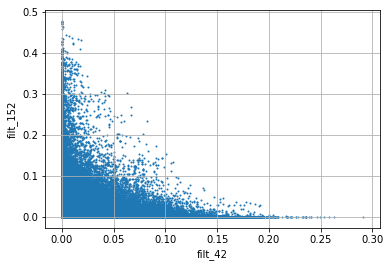

In [11]:
df.plot.scatter(x='filt_42', y='filt_152', s=1, loglog=False, grid=True)

/home/rcug/.conda/envs/DeepUnderstanding/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


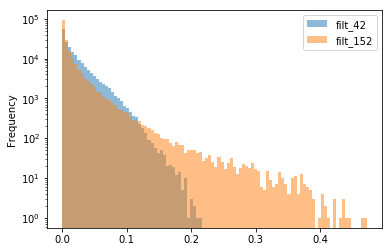

In [12]:
df[df.filt_42 > 0 ][df.filt_152 > 0].plot.hist(alpha=0.5, bins=100, logy=True)

## Wortlisten

In [13]:
# Top _42
df.nlargest(20, 'filt_42').reset_index()[['index','filt_42']].join(df.nlargest(20, 'filt_152').reset_index()[['index','filt_152']], lsuffix=' Top _42', rsuffix=' Top _152')

,index Top _42,filt_42,index Top _152,filt_152
0,"e, he,",0.291002,nzen. D,0.477913
1,"he, he,",0.262942,inz spr,0.476679
2,", he, h",0.257629,z spran,0.476173
3,"he, he",0.253317,nz spra,0.475181
4,"m, so,",0.249329,rinz sp,0.474882
5,", so, d",0.246213,inzen.,0.471814
6,"he, Ah",0.240648,nzen. M,0.470221
7,"He, he,",0.240263,inz bes,0.466524
8,"he, Ahr",0.238715,rinzen.,0.464752
9,", he, A",0.235837,zen eri,0.458877
